In [ ]:
# prompt: code to load data and show head

import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('heart_dataset.csv')

# Display the first 5 rows of the DataFrame
print(df.head())

    age     sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  52.0    Male  0.0       125   212    0        1      168      0      1.0   
1   NaN    Male  0.0       140   203    1        0      155      1      3.1   
2   NaN    Male  0.0       145   174    0        1      125      1      2.6   
3  61.0    Male  0.0       148   203    0        1      161      0      0.0   
4  62.0  Female  0.0       138   294    1        1      106      0      1.9   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


target
0    484
1    216
Name: count, dtype: int64


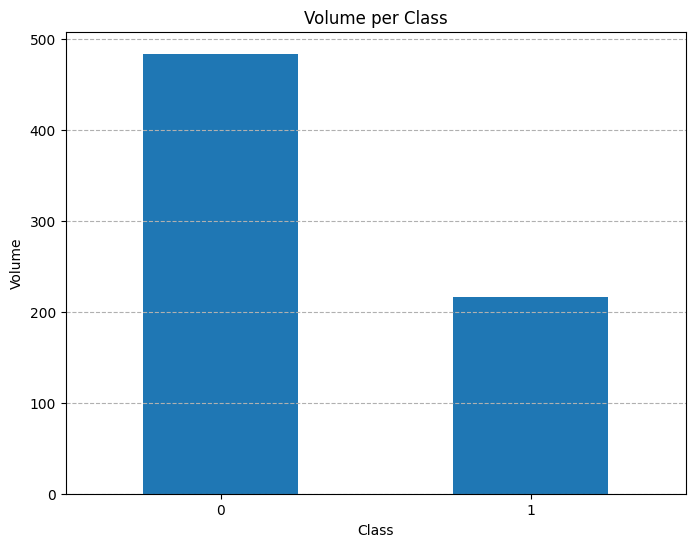

In [ ]:
# prompt: write a code of barchat to see how many volume each class have

import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['target'].value_counts()
print(class_counts)

# Create the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Volume per Class')
plt.xlabel('Class')
plt.ylabel('Volume')
plt.xticks(rotation=0)  # Keep class names horizontal
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
# prompt: write code to count missing values in each column

# Count the number of missing values in each column
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("\nMissing values count per column:")
missing_values_count


Missing values count per column:


,0
age,74
sex,0
cp,66
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 👇 Basic data preprocessing
def process_data(df):
    # Encode "sex" column: Male = 1, Female = 0
    if 'sex' in df.columns:
        df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

    # Fill missing values with median (only for numeric columns)
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col].fillna(df[col].median(), inplace=True)

    return df

In [ ]:
# 📦 Apply preprocessing
df = process_data(df)

# 🔀 Split into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# ✂️ Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ Confirm shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (560, 13)
Test shape: (140, 13)


<ipython-input-3-5da52e781db0>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Step-by-Step: Hyperparameter Tuning + Model Training

In [ ]:
!pip install xgboost hyperopt


In [ ]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn.metrics import roc_auc_score
import xgboost as xgb

# ⚙️ Define the objective function for hyperparameter tuning
def objective(params):
    # Ensure max_depth is integer
    params['max_depth'] = int(params['max_depth'])

    model = xgb.XGBClassifier(
        n_estimators=100,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **params
    )

    model.fit(X_train, y_train)
    preds = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, preds)

    return -auc  # We minimize loss



In [ ]:
# 🔍 Search space for tuning
space = {
    'max_depth': hp.quniform('max_depth', 3, 6, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),  # log scale between 0.0067 and 1
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'gamma': hp.uniform('gamma', 0, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 10),
    'reg_lambda': hp.uniform('reg_lambda', 1, 10),
    'min_child_weight': hp.uniform('min_child_weight', 0, 10)
}

# 🧪 Run Hyperopt
trials = Trials()
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=30,
    trials=trials
)


print("✅ Best hyperparameters:", best_params)


  7%|▋         | 2/30 [00:00<00:01, 16.93trial/s, best loss: -0.9563983488132094]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 27%|██▋       | 8/30 [00:00<00:01, 20.66trial/s, best loss: -0.9563983488132094]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_lab

 43%|████▎     | 13/30 [00:00<00:00, 19.91trial/s, best loss: -0.9628482972136222]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 57%|█████▋    | 17/30 [00:00<00:00, 19.09trial/s, best loss: -0.976780185758514] 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 70%|███████   | 21/30 [00:01<00:00, 18.66trial/s, best loss: -0.976780185758514]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 77%|███████▋  | 23/30 [00:01<00:00, 15.44trial/s, best loss: -0.976780185758514]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 83%|████████▎ | 25/30 [00:02<00:01,  4.14trial/s, best loss: -0.976780185758514]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 90%|█████████ | 27/30 [00:03<00:00,  3.96trial/s, best loss: -0.976780185758514]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 30/30 [00:03<00:00,  8.58trial/s, best loss: -0.976780185758514]
✅ Best hyperparameters: {'colsample_bytree': np.float64(0.991531201882204), 'gamma': np.float64(0.7215360131966442), 'learning_rate': np.float64(0.14618658715562108), 'max_depth': np.float64(5.0), 'min_child_weight': np.float64(0.37371676033970513), 'reg_alpha': np.float64(0.6026967668539629), 'reg_lambda': np.float64(4.601918314826419), 'subsample': np.float64(0.9028117937565624)}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:54:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



In [ ]:
!pip install --upgrade xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [ ]:
# 🧠 Handle class imbalance
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

# 🛠️ Fix Hyperopt parameter types
best_params['max_depth'] = int(best_params['max_depth'])

# 🧪 Convert data into DMatrix (XGBoost's internal format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 🧰 Create full params dictionary
xgb_params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "use_label_encoder": False,
    "random_state": 42,
    "scale_pos_weight": scale_pos_weight,
    **best_params
}

# 🏋️ Train with early stopping using low-level API
final_model = xgb.train(
    params=xgb_params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=[(dtest, "validation")],
    early_stopping_rounds=20,
    verbose_eval=True
)


[0]	validation-logloss:0.61754
[1]	validation-logloss:0.56352
[2]	validation-logloss:0.51430
[3]	validation-logloss:0.46919
[4]	validation-logloss:0.43384
[5]	validation-logloss:0.40270
[6]	validation-logloss:0.37792
[7]	validation-logloss:0.35877
[8]	validation-logloss:0.33819
[9]	validation-logloss:0.31945
[10]	validation-logloss:0.30268
[11]	validation-logloss:0.28908
[12]	validation-logloss:0.27726
[13]	validation-logloss:0.26564
[14]	validation-logloss:0.25765
[15]	validation-logloss:0.25208
[16]	validation-logloss:0.24445
[17]	validation-logloss:0.23959
[18]	validation-logloss:0.23242
[19]	validation-logloss:0.22409
[20]	validation-logloss:0.21799
[21]	validation-logloss:0.21188
[22]	validation-logloss:0.20671
[23]	validation-logloss:0.20087
[24]	validation-logloss:0.19778
[25]	validation-logloss:0.19368
[26]	validation-logloss:0.19021
[27]	validation-logloss:0.18947
[28]	validation-logloss:0.18661
[29]	validation-logloss:0.18504
[30]	validation-logloss:0.18257
[31]	validation-lo

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:00:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  msg += " or "


[80]	validation-logloss:0.15312
[81]	validation-logloss:0.15314
[82]	validation-logloss:0.15314
[83]	validation-logloss:0.15314
[84]	validation-logloss:0.15313
[85]	validation-logloss:0.15310
[86]	validation-logloss:0.15304
[87]	validation-logloss:0.15306
[88]	validation-logloss:0.15306
[89]	validation-logloss:0.15306
[90]	validation-logloss:0.15306
[91]	validation-logloss:0.15208
[92]	validation-logloss:0.15212
[93]	validation-logloss:0.15213
[94]	validation-logloss:0.15209
[95]	validation-logloss:0.15209
[96]	validation-logloss:0.15209
[97]	validation-logloss:0.15212
[98]	validation-logloss:0.15212
[99]	validation-logloss:0.15212
[100]	validation-logloss:0.15214
[101]	validation-logloss:0.15215
[102]	validation-logloss:0.15215
[103]	validation-logloss:0.15216
[104]	validation-logloss:0.15219
[105]	validation-logloss:0.15219
[106]	validation-logloss:0.15226
[107]	validation-logloss:0.15223
[108]	validation-logloss:0.15223
[109]	validation-logloss:0.15219
[110]	validation-logloss:0.151

=== Model Evaluation Metrics ===
AUC-ROC: 0.9843
Accuracy: 0.9571
Precision: 0.9706
Recall: 0.8684
F1 Score: 0.9167


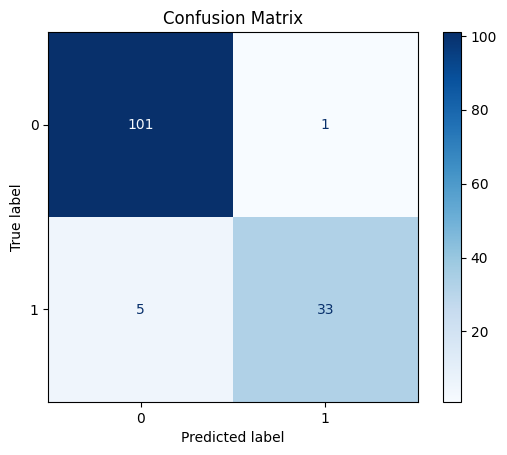

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, accuracy_score,
    precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Prepare test data DMatrix
dtest = xgb.DMatrix(X_test)

# Predict probabilities and classes
y_proba = final_model.predict(dtest)  # probabilities
y_pred = (y_proba >= 0.5).astype(int)  # binary predictions with 0.5 threshold

# Print metrics
print("=== Model Evaluation Metrics ===")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
Yo, those numbers look solid! 🔥

AUC 0.98+ means your model is excellent at ranking positives vs negatives.

Accuracy ~96% means it’s right most of the time.

Precision 97% shows when it predicts positive, it’s usually correct — great for avoiding false alarms.

Recall 87% means it catches most of the actual positives (pretty important for medical data).

F1 ~0.92 balances precision & recall nicely.